# Model `GreConD` and `GreConDPlus`

In [44]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 30
[I] n            : 50
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


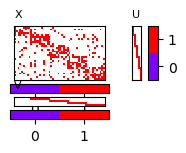

<Figure size 640x480 with 0 Axes>

In [45]:
# from generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=10, n=10, k=5, overlap=[0.1, 0.1])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix()

from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=30, n=50, k=5, overlap=[0.1, 0.1])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix()

In [47]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [48]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718363495
[I]   train_size   : 337
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718363495


[I] k            : None
[I] tol          : 0.1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] k: 0, score: 20, error: 0.211, shape: [2.0, 10.0]
[I] k: 1, score: 16, error: 0.201, shape: [2.0, 8.0]
[I] k: 2, score: 14, error: 0.191, shape: [2.0, 7.0]
[I] k: 3, score: 7, error: 0.187, shape: [1.0, 17.0]
[I] k: 4, score: 10, error: 0.180, shape: [1.0, 10.0]
[I] k: 5, score: 6, error: 0.176, shape: [1.0, 6.0]
[I] k: 6, score: 7, error: 0.171, shape: [1.0, 7.0]
[I] k: 7, score: 7, error: 0.167, shape: [1.0, 14.0]
[I] k: 8, score: 4, error: 0.164, shape: [1.0, 12.0]
[I] k: 9, score: 12, error: 0.156, shape: [1.0, 12.0]
[I] k: 10, score: 7, error: 0.151, shape: [1.0, 15.0]
[I] k: 11, score: 7, error: 0.147, shape: [1.0, 7.0]
[I] k: 12, score: 15, error: 0.137, shape: [1.0, 15.0]
[I] k: 13, score: 19, error: 0.124, shape: [1.0, 19.0]
[I] k: 14, score: 13, error: 0.115, shape: [1.0, 13.0]
[I] k: 15, 

train                      \
                                                     0                       
                 time   k score        shape    Recall Precision  Accuracy   
0   14/06/24 07:11:36   0    20  [2.0, 10.0]  0.059347       1.0  0.788667   
1   14/06/24 07:11:36   1    16   [2.0, 8.0]  0.106825       1.0  0.799333   
2   14/06/24 07:11:36   2    14   [2.0, 7.0]  0.148368       1.0  0.808667   
3   14/06/24 07:11:36   3     7  [1.0, 17.0]  0.169139       1.0  0.813333   
4   14/06/24 07:11:37   4    10  [1.0, 10.0]  0.198813       1.0  0.820000   
5   14/06/24 07:11:37   5     6   [1.0, 6.0]  0.216617       1.0  0.824000   
6   14/06/24 07:11:37   6     7   [1.0, 7.0]  0.237389       1.0  0.828667   
7   14/06/24 07:11:37   7     7  [1.0, 14.0]  0.258160       1.0  0.833333   
8   14/06/24 07:11:37   8     4  [1.0, 12.0]  0.270030       1.0  0.836000   
9   14/06/24 07:11:37   9    12  [1.0, 12.0]  0.305638       1.0  0.844000   
10  14/06/24 07:11:37  10     7  [1.0, 15.0]  0.326409       1.0  0.848667   
11  14/06/24 07:11:38  11     7   [1.0, 7.0]  0.347181       1.0  0.853333   
12  14/06/24 07:11:38  12    15  [1.0, 15.0]  0.391691       1.0  0.863333   
13  14/06/24 07:11:38  13    19  [1.0, 19.0]  0.448071       1.0  0.876000   
14  14/06/24 07:11:39  14    13  [1.0, 13.0]  0.486647       1.0  0.884667   
15  14/06/24 07:11:39  15     8   [1.0, 8.0]  0.510386       1.0  0.890000   
16  14/06/24 07:11:39  16     9   [1.0, 9.0]  0.537092       1.0  0.896000   
17  14/06/24 07:11:39  17    11  [1.0, 11.0]  0.569733       1.0  0.903333   

              
              
          F1  
0   0.112045  
1   0.193029  
2   0.258398  
3   0.289340  
4   0.331683  
5   0.356098  
6   0.383693  
7   0.410377  
8   0.425234  
9   0.468182  
10  0.492170  
11  0.515419  
12  0.562900  
13  0.618852  
14  0.654691  
15  0.675835  
16  0.698842  
17  0.725898

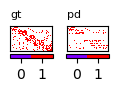

[I] model saved as: 24-06-14_19-11-39_GreConD.pickle


<Figure size 640x480 with 0 Axes>

In [49]:
from models import GreConD
import warnings

model = GreConD(k=None, tol=0.1)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

In [ ]:
from models import GreConDPlus
import warnings

model = GreConD(k=None, tol=0.1)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)